# Importación de librería

In [14]:
%%capture
%pip install pandas 

In [15]:
import pandas as pd

# Lectura de datos

In [18]:
# Importar un fichero .csv con la información de población, esperanza de vida y renta per cápita de los países del mundo.
# r antes de la ruta para que no interprete los caracteres especiales.
df = pd.read_csv(r'../Datasets/1.3/Info_pais.csv', encoding = "ISO-8859-1", delimiter = ';')

In [19]:
# Visualizar las primeras filas del dataframe.
df.head()

,País,Poblacion,Renta per capita,Esperanza de vida
0,United States,325084756,59939,"78,9"
1,China,1421021791,8612,"76,7"
2,Japan,127502725,38214,"84,5"
3,Germany,82658409,44680,"81,2"
4,India,1338676785,1980,"69,4"


# Manipulación de datos

In [20]:
# Ordenar el dataframe por «Esperanza de vida» de forma ascendente.
df_order = df.sort_values("Esperanza de vida", ascending = True)

In [21]:
# Visualizar las primeras filas del dataframe ordenado.
df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida
151,Central African Republic,4596023,424,"52,8"
149,Lesotho,2091534,1233,"53,7"
128,Chad,15016753,657,54
143,Sierra Leone,7488423,504,"54,3"
28,Nigeria,190873244,1969,"54,3"


# Visualización

📊 `matplotlib` es una librería de visualización de datos en Python.

In [22]:
%%capture
%pip install matplotlib

In [23]:
# Importar la librería matplotlib.
import matplotlib.pyplot as plt

In [24]:
# Crear una lista con los años.
anios = [2020, 2021, 2022]

In [27]:
# Crear una lista de valores.
valores = [5, 8, 15]

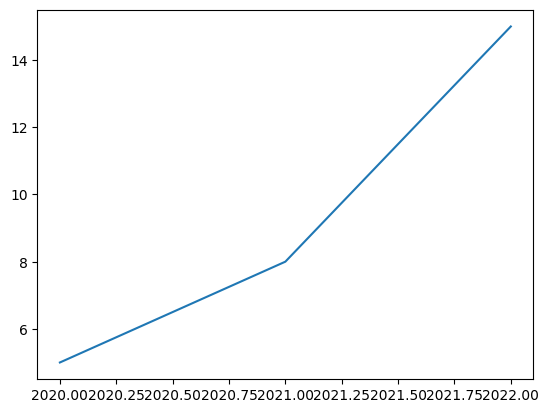

In [28]:
# Crear un gráfico que relacione los años con los valores.
plt.plot(anios, valores)

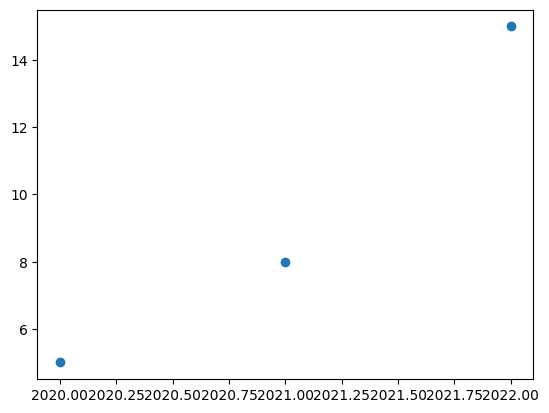

In [29]:
# Observar solo los puntos.
plt.scatter(anios, valores)

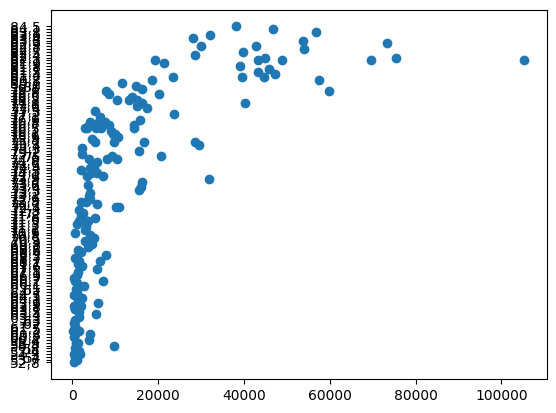

In [30]:
# Crear un gráfico, el eje X será la «Renta per cápita» y el eje Y será la «Esperanza de vida».
plt.scatter(df_order["Renta per capita"], df_order["Esperanza de vida"])

Text(0, 0.5, 'Esperanza de vida')

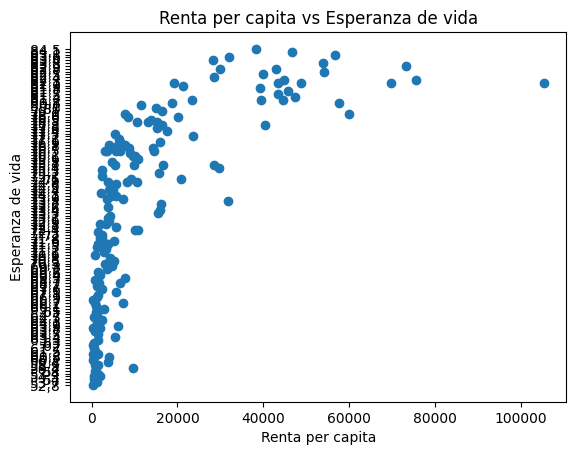

In [31]:
plt.scatter(df_order["Renta per capita"], df_order["Esperanza de vida"])
# Añadir título al gráfico.
plt.title("Renta per capita vs Esperanza de vida")
# Añadir etiquetas a los ejes.
plt.xlabel("Renta per capita")
plt.ylabel("Esperanza de vida")

In [34]:
# Crear una columna nueva en el dataframe que sea la población normalizada.
# La normalización es un proceso que cambia el rango de los valores de los datos a una escala común, sin distorsionar las diferencias en los rangos de valores.
# En este caso, está dividiendo cada valor en la columna "Poblacion" por el valor máximo de la misma columna dividido por 10000. 
df_order["Pob_norm"] = df_order["Poblacion"]/max((df_order["Poblacion"]/10000))

In [35]:
# Validar la nueva columna.
df_order.head()

,País,Poblacion,Renta per capita,Esperanza de vida,Pob_norm
151,Central African Republic,4596023,424,"52,8",32.343086
149,Lesotho,2091534,1233,"53,7",14.718522
128,Chad,15016753,657,54,105.675740
143,Sierra Leone,7488423,504,"54,3",52.697454
28,Nigeria,190873244,1969,"54,3",1343.211239


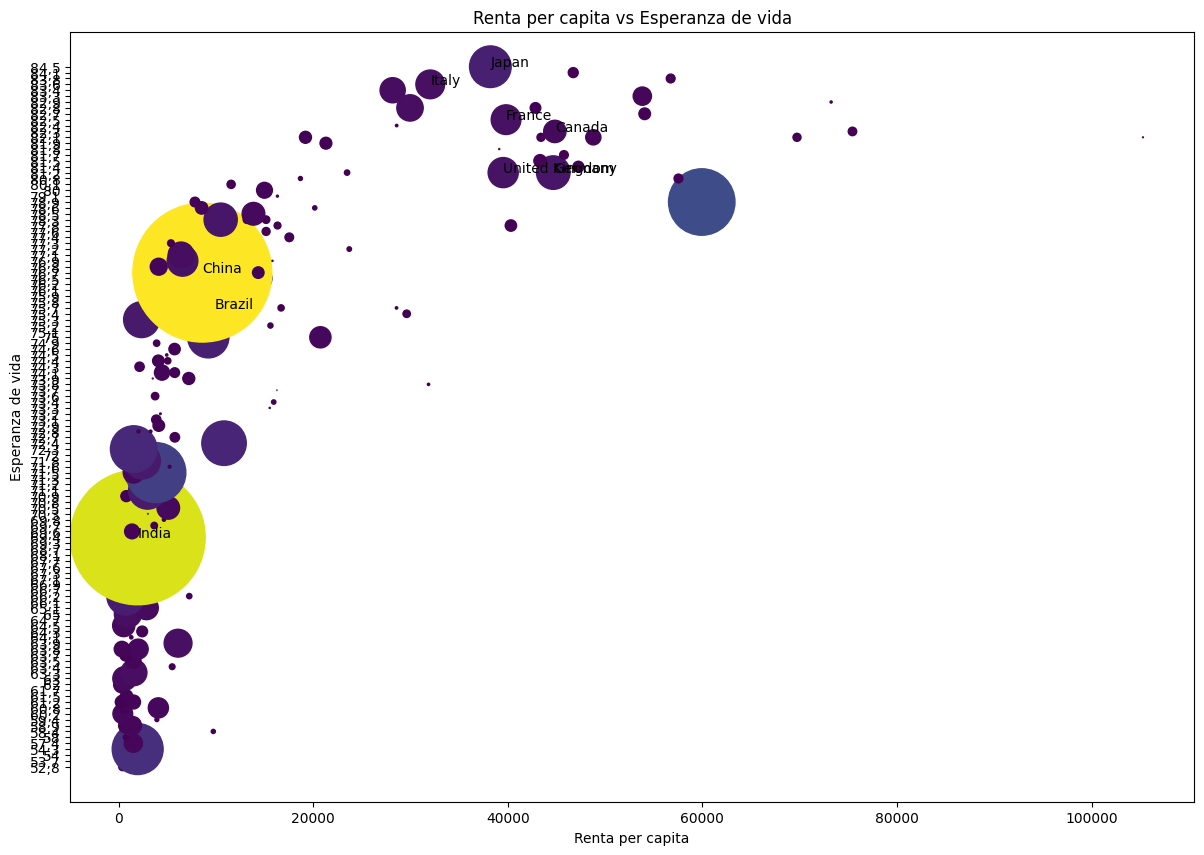

In [37]:
# Representar cada país con un tamaño de punto proporcional a su población normalizada.
plt.scatter(df_order["Renta per capita"], df_order["Esperanza de vida"], s = df_order["Pob_norm"], c = df_order["Pob_norm"])
plt.title("Renta per capita vs Esperanza de vida")
plt.xlabel("Renta per capita")
plt.ylabel("Esperanza de vida")

# Añadir etiquetas a los puntos.
for i in range(1, 10):
    plt.annotate(df_order["País"][i], (df_order["Renta per capita"][i], df_order["Esperanza de vida"][i]))

fig = plt.gcf()
fig.set_size_inches(14.5, 10)

plt.yticks(ticks=range(1, 120, 10))